In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [94]:
# Libraries to use
from __future__ import division 
import talib as tb
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import cvxopt as cv
from cvxopt import solvers

In [7]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [3]:
%matplotlib inline

In [4]:
# Files to use 
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameIndexVolume = 'LZ_GPA_INDXQUOTE_VOLUME.csv'
filenameHSOpen = 'LZ_GPA_INDXQUOTE_OPEN.csv'
filenameHS300Weight = 'LZ_GPA_INDEX_HS300WEIGHT.csv'
filanemaZX500Weight = 'LZ_GPA_INDEX_CSI500WEIGHT.csv'

In [5]:
# some useful parameters
startTime =  datetime.strptime('20120101', '%Y%m%d')
endTime = datetime.strptime('20161231', '%Y%m%d')


timeStampNum = 2500 # Number of time period
#thresholdNum = 0.05  # thresholdNum to filter stocks by Nan's amount
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [57]:
# Constants
path = ff.data_path
timeStampNum = 1000
thresholdNum = 0.2
HSIndex='000300.SH'
sampleNum = 500

In [72]:
targetAsset = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime :endTime].iloc[:,:4]

tANetWorth = targetAsset /targetAsset.iloc[0]

tACovMatrix = tANetWorth.ewm(ignore_na=True, min_periods=0, halflife = 60).cov(pairwise = True).iloc[-1]

endOfMonthList = ff.getLastDayOfMonth(tANetWorth.index)[1]
positionSheet = pd.DataFrame(index=tANetWorth.index, columns = tANetWorth.columns, data= None, dtype =float)
positionSheet

,000001.SH,801010.SI,801020.SI,801030.SI
LZ_GPA_INDXQUOTE_CLOSE-d,,,,
2012-01-04,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN
2012-01-16,NaN,NaN,NaN,NaN


In [24]:
tANetWorth 
t1 = tANetWorth .pct_change().dropna().iloc[1:]
originalShapeRatio = t1.mean()/t1.std()
originalShapeRatio.name = 'Shape_Ratio'

In [43]:
t1 .mean()

000001.SH    0.000423
801010.SI    0.000811
801020.SI    0.000015
801030.SI    0.000767
dtype: float64

In [20]:
origiMaxdd = tANetWorth .copy()
origiMaxdd .iloc[0] = 0
for date in tANetWorth.index[1:]:
    origiMaxdd .loc[date] = 1-tANetWorth.loc[date]/tANetWorth.loc[:date].max()
origiMaxdd.max()

000001.SH    0.485970
801010.SI    0.465448
801020.SI    0.536796
801030.SI    0.504192
dtype: float64

In [30]:
calmaRatio = t1.mean()/origiMaxdd.max()
calmaRatio.name = 'Calmar_Ratio'

In [47]:
basePoint = 0.005
InfoDF = pd.concat([originalShapeRatio,calmaRatio],axis=1)
InfoDF.rank()
InfoWeight = np.array([0.6,0.4])
InfoDF = InfoDF.rank() * InfoWeight
InfoDF = InfoDF.sum(axis=1) - InfoDF.sum(axis=1).mean()
(0.3 + InfoDF*basePoint ).values

array([ 0.2975,  0.3075,  0.2925,  0.3025])

In [48]:
InfoDF*basePoint

000001.SH   -0.0025
801010.SI    0.0075
801020.SI   -0.0075
801030.SI    0.0025
dtype: float64

In [83]:
basePoint = 0.1
returnDF = tANetWorth.pct_change()
for date in tANetWorth.index:
    tempdf = returnDF.loc[:date]
    tempNWdf = tANetWorth.loc[:date]
    if date in endOfMonthList and  tempdf.shape[0] >= 120:
        # Adjusted threshold for each asset
        originalShapeRatio = tempdf.mean()/tempdf.std()
        originalShapeRatio.name = 'Shape_Ratio'
        origiMaxdd = tempNWdf.copy()
        origiMaxdd .iloc[0] = 0
        for i in tempNWdf.index[1:]:
            origiMaxdd .loc[i] = 1-tempNWdf.loc[i]/tempNWdf.loc[:i].max()
        calmaRatio = tempdf.mean()/origiMaxdd.max()
        calmaRatio.name = 'Calmar_Ratio'
        InfoDF = pd.concat([originalShapeRatio,calmaRatio],axis=1)
        InfoWeight = np.array([0.6,0.4])   # customized
        InfoDF = InfoDF.rank() * InfoWeight
        InfoDF = InfoDF.sum(axis=1) - InfoDF.sum(axis=1).mean()
        
        temCovMatrix = tempdf.iloc[-120:]. ewm(ignore_na=True, min_periods=0, halflife = 60).cov(pairwise = True).iloc[-1]
        #print temCovMatrix
        # Optimize 
        stkNum = temCovMatrix.shape[1]
        P = cv.matrix(temCovMatrix.values)
        q = cv.matrix(0.0, (stkNum, 1))
        G = cv.matrix(np.concatenate((np.diag(np.ones(stkNum)), - np.diag(np.ones(stkNum)))))
        h = cv.matrix(np.append((0.3 + InfoDF * basePoint).values, np.zeros(stkNum)))
        A = cv.matrix(np.ones(stkNum)).T
        b = cv.matrix(1.0).T
        sol = solvers.qp(P, q, G, h, A, b)
        positionSheet.loc[date] = np.array(list(sol['x']))

     pcost       dcost       gap    pres   dres
 0:  8.1217e-05 -1.3073e+00  1e+01  3e+00  3e-16
 1:  8.2853e-05 -8.9000e-01  9e-01  1e-02  2e-16
 2:  8.3034e-05 -1.0642e-02  1e-02  1e-04  4e-16
 3:  8.3031e-05 -3.4960e-05  1e-04  1e-06  7e-18
 4:  8.2647e-05  7.2101e-05  1e-05  1e-07  6e-19
 5:  8.0360e-05  7.8001e-05  2e-06  8e-17  4e-20
 6:  7.9933e-05  7.9849e-05  8e-08  6e-17  2e-20
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.7372e-05 -1.3073e+00  1e+01  3e+00  2e-16
 1:  7.8644e-05 -8.8345e-01  9e-01  4e-16  4e-16
 2:  7.8644e-05 -8.7670e-03  9e-03  2e-16  2e-16
 3:  7.8633e-05 -2.0143e-05  1e-04  1e-16  3e-18
 4:  7.7994e-05  6.8784e-05  9e-06  1e-16  3e-19
 5:  7.6572e-05  7.3484e-05  3e-06  8e-17  2e-20
 6:  7.6314e-05  7.6216e-05  1e-07  8e-17  3e-20
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.3606e-05 -1.3049e+00  1e+01  3e+00  2e-16
 1:  9.5975e-05 -8.8578e-01  9e-01  1e-02  6e-16
 2:  9.6224e-05 -1.0539e

In [84]:
positionSheet.dropna()

,000001.SH,801010.SI,801020.SI,801030.SI
time,,,,
2012-07-31,0.149929,0.448640,0.112403,0.289027
2012-08-31,0.189895,0.346867,0.061452,0.401786
2012-09-28,0.149976,0.249962,0.150070,0.449992
2012-10-31,0.289978,0.149839,0.110198,0.449986
2012-11-30,0.349999,0.149949,0.050128,0.449924
2012-12-31,0.449997,0.149909,0.050155,0.349939
2013-01-31,0.449986,0.198134,0.001891,0.349989
2013-02-28,0.349960,0.199843,0.000254,0.449943
2013-03-29,0.349926,0.167785,0.033543,0.448745


In [85]:
positionSheet1 = positionSheet.fillna(method='ffill').fillna(0)
positionSheet

,000001.SH,801010.SI,801020.SI,801030.SI
time,,,,
2012-01-04,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN
2012-01-16,NaN,NaN,NaN,NaN


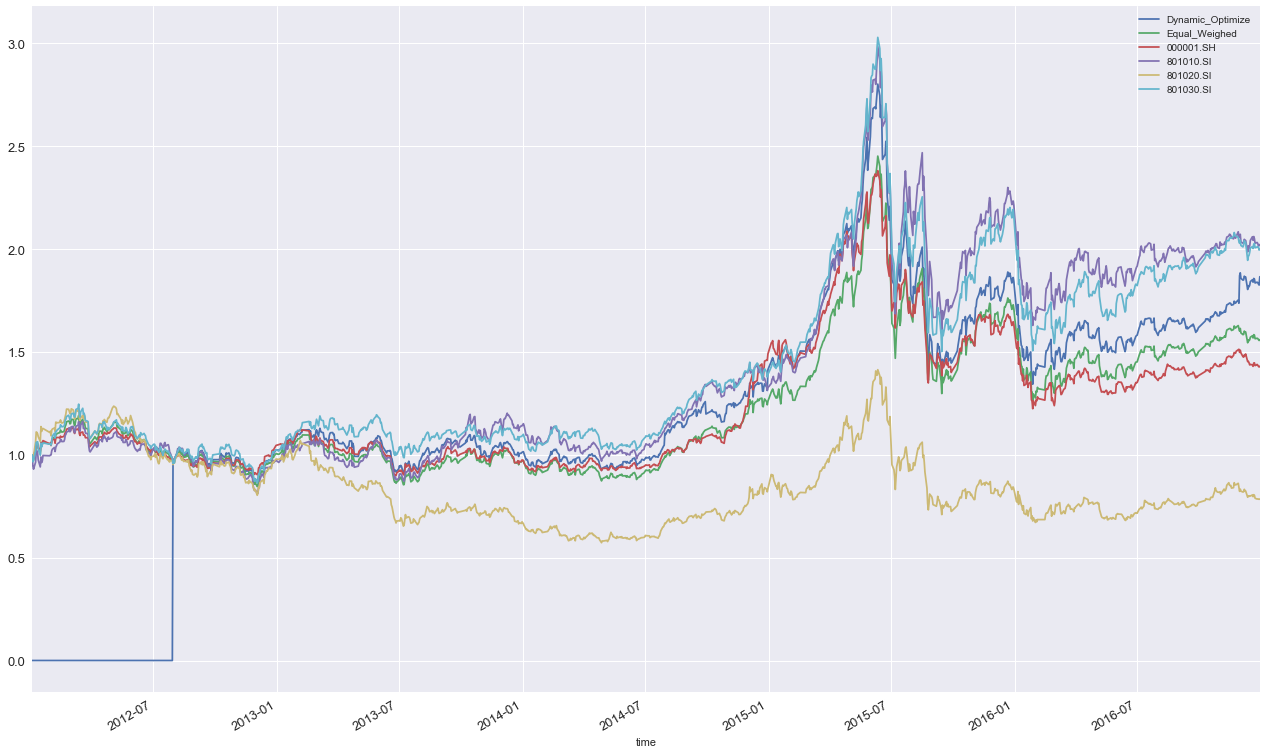

In [86]:
totalNW = (positionSheet1 * tANetWorth).sum(axis=1)
equalWeighted = (tANetWorth.sum(axis=1)/4)
equalWeighted.name = 'Equal_Weighed'

totalNW.name ='Dynamic_Optimize'

compareNW = pd.concat([totalNW ,equalWeighted ],axis=1)
compareNW = pd.concat([compareNW ,tANetWorth ],axis=1)
compareNW.index.name = 'time'
compareNW.plot(figsize=(22,14),fontsize =13,legend =True)

In [87]:
compareNW

,Dynamic_Optimize,Equal_Weighed,000001.SH,801010.SI,801020.SI,801030.SI
time,,,,,,
2012-01-04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-05,0.000000,0.971178,0.990348,0.945572,0.982490,0.966300
2012-01-06,0.000000,0.974103,0.997237,0.930368,0.993959,0.974849
2012-01-09,0.000000,1.017895,1.026044,0.963819,1.061592,1.020124
2012-01-10,0.000000,1.060072,1.053634,1.014860,1.111130,1.060663
2012-01-11,0.000000,1.059718,1.049164,1.019525,1.108796,1.061388
2012-01-12,0.000000,1.056175,1.048686,1.010516,1.101953,1.063545
2012-01-13,0.000000,1.031963,1.034660,0.974467,1.088276,1.030449
2012-01-16,0.000000,1.005233,1.016965,0.941215,1.064835,0.997916


In [88]:
t1 = compareNW.pct_change().dropna().iloc[1:]
shapeRatio1 = t1.mean()/t1.std()
shapeRatio1

Dynamic_Optimize    0.043172
Equal_Weighed       0.034667
000001.SH           0.030811
801010.SI           0.045274
801020.SI           0.001216
801030.SI           0.046579
dtype: float64

In [89]:
compareNW.dropna().pct_change().dropna()

,Dynamic_Optimize,Equal_Weighed,000001.SH,801010.SI,801020.SI,801030.SI
time,,,,,,
2012-07-31,inf,-0.016692,-0.002976,-0.019635,-0.019685,-0.024365
2012-08-01,0.012817,0.013589,0.009377,0.011687,0.019643,0.013748
2012-08-02,-0.006366,-0.007760,-0.005735,-0.001829,-0.011903,-0.011609
2012-08-03,0.017495,0.016992,0.010238,0.014892,0.017594,0.025365
2012-08-06,0.021182,0.019574,0.010371,0.022910,0.020733,0.024265
2012-08-07,0.012711,0.008550,0.001255,0.019659,0.000678,0.012387
2012-08-08,-0.004008,-0.001038,0.001562,-0.010792,0.004986,0.000385
2012-08-09,0.013062,0.010157,0.006068,0.017764,0.003699,0.012893
2012-08-10,-0.002725,-0.003741,-0.002432,-0.003550,-0.010461,0.001337


In [90]:
maxdd = compareNW.copy()
maxdd.iloc[0] = 0
for date in compareNW.index[1:]:
    maxdd.loc[date] = 1-compareNW.loc[date]/compareNW.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

,Max_drawdown,Time
Dynamic_Optimize,0.520626,2016-01-28
Equal_Weighed,0.486450,2016-01-28
000001.SH,0.485970,2016-01-28
801010.SI,0.465448,2015-09-15
801020.SI,0.536796,2014-04-28
801030.SI,0.504192,2015-09-15


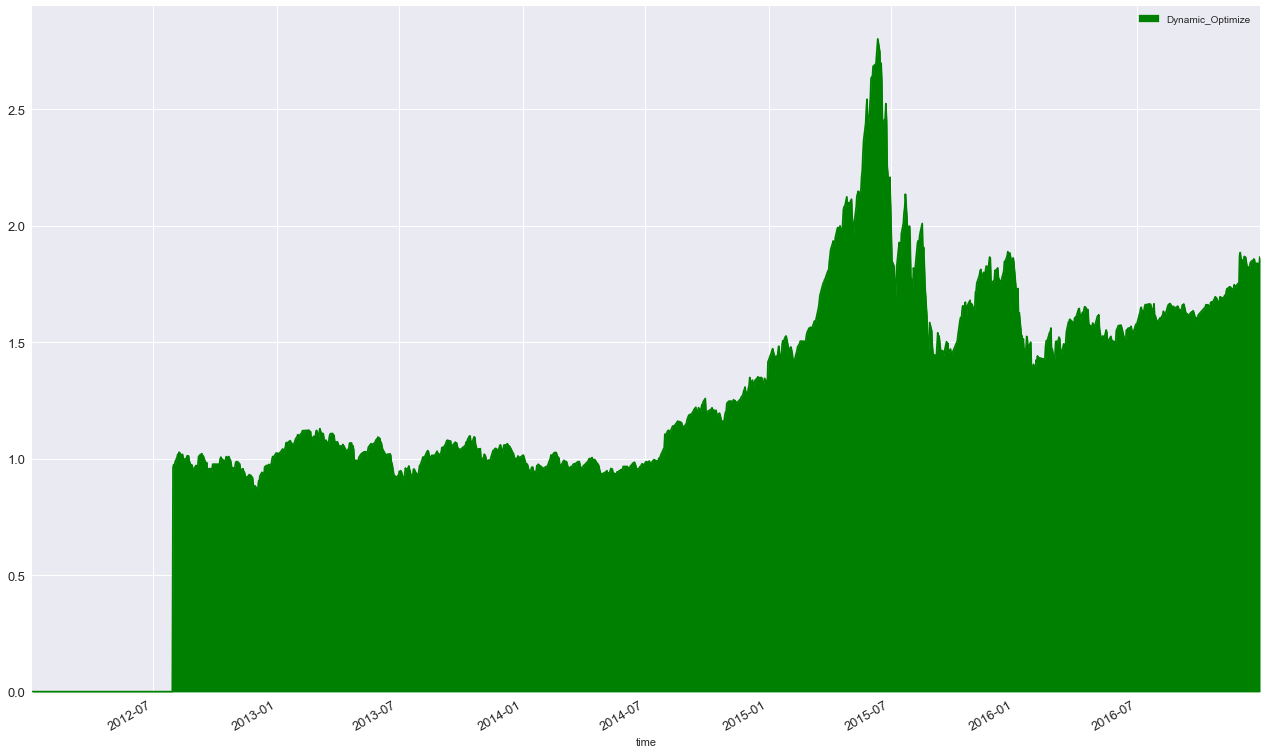

In [93]:
fig = plt.figure(figsize=(18,14))
# Add a subplot
totalNW.plot.area(figsize=(22,14),fontsize =13,color='g',legend =True)
#equatWeighted.plot(figsize=(22,14),fontsize =13,color='r',legend = True)

In [ ]:
#positionSheet.dropna(axis=0)

In [ ]:
positionSheet

In [ ]:
HS300WeightDF = pd.read_csv(path+filanemaZX500Weight,infer_datetime_format=True,parse_dates=[0],index_col=0).iloc[-2000:]

In [ ]:
HS300WeightDF

In [ ]:
for i in range(1,len(HS300WeightDF)):
    HS300WeightToday = HS300WeightDF.iloc[i].dropna().index.tolist()
    #print HS300WeightToday
    print len(HS300WeightToday)
    HS300WeightYes = HS300WeightDF.iloc[i-1].dropna().index.tolist()
    if len(set(HS300WeightToday) | set(HS300WeightYes)) != 500:
        print HS300WeightDF.index[i]

In [ ]:
HS300WeightDF

In [ ]:
benchMarkClose = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkOpen = pd.read_csv(path+filenameHSOpen,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkClose.head()

In [ ]:
def getSVD(inputArray,t,m):
    inputmatrix = getNewMatrix(inputArray,t,m)
    #print inputmatrix
    u,s,v = np.linalg.svd(inputmatrix)
    eviNum = 1 if s[0]/s.sum() > 0.99  else 2
    sNew = np.zeros((eviNum,eviNum))
    np.fill_diagonal(sNew,s[:eviNum])
    matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])
    newts = recreateArray(matrixForts,t,m)
    return newts

In [ ]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [ ]:
def getNewMatrix(inputArray, t, m):
    newMatrix = []
    n = t-m+1
    for i in range(n):
        newdata = list(inputArray[i:m+i])
        newMatrix.append(newdata)
    #newMatrix = np.array(newMatrix).reshape(n,m)
    return np.array(newMatrix)

In [ ]:
benchMarkOpen[-15:]

In [ ]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
len(inputmatrix)

In [ ]:
def calSVD(newMatrix):
    u,s,v = np.linalg.svd(newMatrix)
    return u,s,v

In [ ]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
u,s,v=calSVD(inputmatrix)
eviNum = 1 if s[0]/s.sum() > 0.99  else 2

In [ ]:
#u[:,eviNum].reshape(7,1)

In [ ]:
sNew = np.zeros((eviNum,eviNum))

In [ ]:
np.fill_diagonal(sNew,s[:eviNum])

In [ ]:
v[:eviNum]

In [ ]:
#np.array([[1,2],[6,3]]).dot(np.array([[1,2],[2,3],[3,4]]))

In [ ]:
def recreateArray(newMatrix,t,m):
    ret = []
    n = t - m +1
    for p in range(1,t+1):
        if p<m:
            alpha = p
        elif p>t-m+1:
            alpha = t-p+1
        else:
            alpha = m
        sigma = 0
        for j in range(1,m+1):
            i = p - j +1
            if i>0 and i<n+1:
                sigma += newMatrix[i-1][j-1]
        ret.append(sigma/alpha)
    return np.array(ret)

In [ ]:
np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew)

In [ ]:
#np.dot(u[:,eviNum].reshape(u.shape[0],eviNum),v[:eviNum])

In [ ]:
np.concatenate((np.diag(np.ones(60)),-np.diag(np.ones(60))))

In [ ]:
a=pd.Series(data=[-1,2,3,4],index = ['a','b','c','d'])
b = pd .Series(data=[4,6,7,8],index = ['a','b','c','d'])
c = pd.Series(data= None ,index =['a','b','c','d','e'] )
a[a>0].index

In [ ]:
matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])

In [ ]:
matrixForts

In [ ]:
ma = benchMarkClose[0:sampleNum].rolling(10,min_periods=1).mean()

In [ ]:
benchMarkClose[0:sampleNum].head()

In [ ]:
ma.tail()

In [ ]:
newts = recreateArray(matrixForts,sampleNum,10)

In [ ]:
getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)

In [ ]:
plt.figure(figsize=(24,16))
plt.plot(benchMarkClose[0:sampleNum].values, 'blue')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5),'red')
#plt.plot(getSVD(benchMarkData[0:sampleNum].values,sampleNum,15),'green')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20),'orange')
plt.title('SVD')

In [ ]:
newDF=pd.DataFrame(index = benchMarkClose[0:sampleNum].index,data = None,columns =['SVD20','SVD5','PRICE'],dtype=float)

In [ ]:
newDF['SVD20'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)
newDF['SVD5'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5)
newDF ['PRICE'] = benchMarkClose[0:sampleNum].values

In [ ]:
newDF['DIFF'] = newDF['SVD5'] - newDF['SVD20']
newDF['Price_change'] = newDF['PRICE'].diff()
newDF
upAccuracy = []
downAccuracy = []
for i in range(1,len(newDF)):
    if (newDF.iloc[i]['DIFF'] > 0) & (newDF.iloc[i-1]['DIFF'] < 0) & (newDF.iloc[i]['Price_change'] > 0) :
        upAccuracy.append(1)
    if (newDF.iloc[i]['DIFF'] < 0) & (newDF.iloc[i-1]['DIFF'] > 0) & (newDF.iloc[i]['Price_change'] < 0) :
        downAccuracy.append(-1)
a,b = len(upAccuracy)/len(newDF[newDF['Price_change']>0]), len(downAccuracy)/len(newDF[newDF['Price_change']<0])

In [ ]:
newDF[newDF['Price_change']>0]

In [ ]:
m=7
t=15
dateList = benchMarkOpen.index
assetSSA = []
assetMA = []
holdingFlag = False
tradinglogSSA ={}
tradinglogMA ={}
portfolioValue ={i:0 for i in benchMarkClose.index[:t]}
ma_strategy = {i:0 for i in benchMarkClose.index[:t]}
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    svdSignal = benchMarkClose.values[:i][-t:]
    #print len(svdSignal)
    newTS = getSVD(svdSignal,t,m)
    #print newTS
    #ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
    if len(assetSSA) !=0 and benchMarkClose[i-2] > newTS[-2] and benchMarkClose[i-1] < newTS[-1]: # sell signal
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogSSA[todayDate] = (sellprice,-1)
        portfolioValue[todayDate] = (sellprice - assetSSA[0])/assetSSA[0] + portfolioValue[yesterDayDate]
        assetSSA = []
    elif len(assetSSA) == 0 and benchMarkClose[i-2] < newTS[-2] and benchMarkClose[i-1] > newTS[-1]: # buy signal
        buyprice = benchMarkOpen[i]
        assetSSA.append(buyprice)
        tradinglogSSA[todayDate] = (buyprice,1)
        #holdingFlag = True
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    else:
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    

In [ ]:
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
### For MA strategy    
    if  len(assetMA) !=0 and benchMarkClose[i-2] > ma.iloc[-2] and benchMarkClose[i-1] < ma.iloc[-1]: # sell signal
        #print 1
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogMA[todayDate] = (sellprice,-1)
        ma_strategy[todayDate] = ( sellprice - assetMA[0])/assetMA[0] + ma_strategy[yesterDayDate]
        assetMA = []
    elif len(assetMA) == 0 and benchMarkClose[i-2] < ma.iloc[-2] and benchMarkClose[i-1] > ma.iloc[-1]: # buy signal
        #print -1
        buyprice = benchMarkOpen[i]
        assetMA.append(buyprice)
        tradinglogMA[todayDate] = (buyprice,1)
        #holdingFlag = True
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    else:
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    #print i , assetMA,sellprice

In [ ]:
 ma_strategy

In [ ]:
portfolioValue

In [ ]:
strategy_cmp = pd.DataFrame() 
strategy_cmp['strategy_ssa5'] = pd.Series(portfolioValue)
strategy_cmp['strategy_ma5'] = pd.Series(ma_strategy)
strategy_cmp.plot(figsize=(20,10))

In [ ]:
benchMarkOpen.rolling(m,min_periods =1).mean()

In [ ]:
tb.MACD(benchMarkOpen.values)

In [ ]:
##-------Index trading volume analysis-------------

In [ ]:
IndexVolumeDF = pd.read_csv(path+filenameIndexVolume,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [ ]:
IndexCloseDF = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [ ]:
IndexVolumeDF[ZZ500Index].corr(IndexCloseDF[ZZ500Index],method='spearman')

In [ ]:
IndexVolumeDF[ZZ500Index].corr(IndexCloseDF[ZZ500Index],method='pearson')

In [ ]:
svdVolume = pd.Series(index = IndexVolumeDF[ZZ500Index].index, data= getSVD(IndexVolumeDF[ZZ500Index].values,len(IndexVolumeDF),12))

svdIndexPrice= pd.Series(index = IndexVolumeDF[ZZ500Index].index, data= getSVD(IndexCloseDF[ZZ500Index].values,len(IndexVolumeDF),12))

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(20, 14), facecolor='w', edgecolor='k',sharex=True) 
IndexVolumeDF[ZZ500Index].plot(ax=axs[0])
axs[0].set_title('Volume')
IndexCloseDF [ZZ500Index].plot(ax=axs[1])
axs[1].set_title('Close')
svdVolume.plot(ax=axs[2])
axs[2].set_title('SVD_Volume')
svdIndexPrice.plot(ax=axs[3])
axs[3].set_title('SVD_Index')

In [ ]:
IndexCloseDF[ZZ500Index].plot(figsize=(20,14))